## *Sentiment Analysis*

In [5]:
# Bonus
import pandas as pd
from textblob import TextBlob
df = pd.read_csv('/Users/roberto/Desktop/steam_reviews.csv').drop('Unnamed: 0', axis=1)
three_top_lan = df['language'].value_counts().head(3)
three_top_lan

language
english     9635437
schinese    3764967
russian     2348900
Name: count, dtype: int64

In [6]:
def sentiment_analysis(df):
    return df['review'].apply(
        lambda review:
            (sentiment:=TextBlob(str(review)).sentiment.polarity) and
            ('positive' if sentiment > 0 else ('negative' if sentiment < 0  else "neutral"))
        )

In [7]:
"""First Bonus challenge for English language"""

df_eng = df[df.language=='english']

df_eng['sentiment'] = sentiment_analysis(df_eng)

/var/folders/jp/fnr369_172b9ghtllhyqdmtw0000gp/T/ipykernel_54490/3880996151.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_eng['sentiment'] = sentiment_analysis(df_eng)


In [8]:
df_eng.loc[df_eng.sentiment == 0.0, ['sentiment']] = 'neutral'
print(df_eng['sentiment'].value_counts())

sentiment
positive    5883519
negative    2056842
neutral     1695076
Name: count, dtype: int64


<Axes: xlabel='sentiment'>

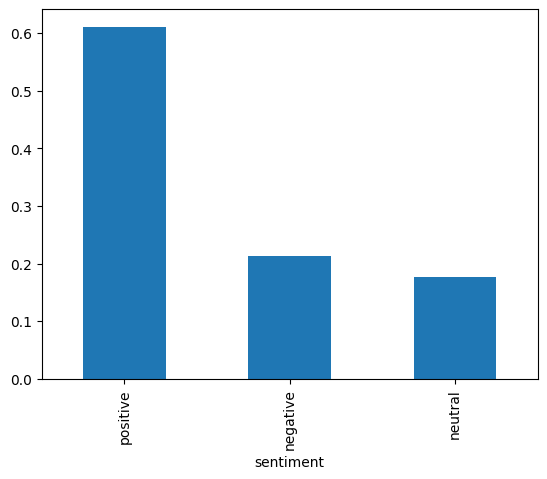

In [9]:
"""Second Bonus challenge for English language"""
df_eng['sentiment'].value_counts(normalize=True).plot.bar()

<Axes: xlabel='recommended'>

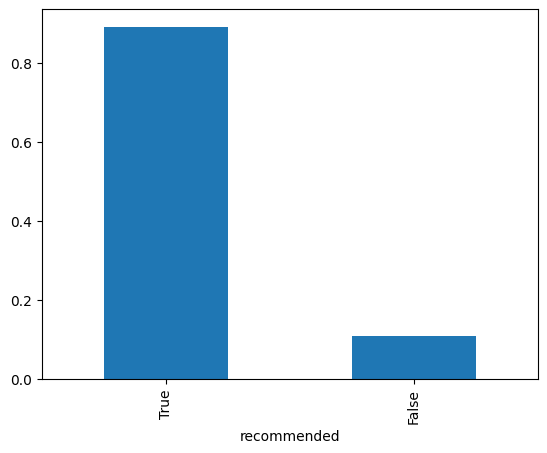

In [10]:
"""Third Bonus challenge for English language"""
df_eng['recommended'].value_counts(normalize=True).plot.bar()

In [11]:
df_eng['sentiment_bin'] = df_eng.sentiment.apply(lambda x: 0 if x=='negative' else 1)

/var/folders/jp/fnr369_172b9ghtllhyqdmtw0000gp/T/ipykernel_54490/3547690851.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_eng['sentiment_bin'] = df_eng.sentiment.apply(lambda x: 0 if x=='negative' else 1)


In [12]:
from scipy.stats import pointbiserialr
correlation, p_value = pointbiserialr(df_eng.sentiment_bin, df_eng.votes_helpful)
print(f"Point-Biserial Correlation: {correlation}")
print(f"P-Value: {p_value}")

Point-Biserial Correlation: 0.00016782993334810462
P-Value: 0.6023940532406791


In [15]:
import time
from tqdm import tqdm
from googletrans import Translator

translator = Translator()

# Filter for schinese language reviews and create a copy to avoid SettingWithCopyWarning
df_sch_russ = df[(df.language == 'schinese') | (df.language == 'russian')].copy()

In [16]:
# Translate reviews and handle potential rate limit issues
tqdm.pandas()
def translate_review(text):
    try:
        return translator.translate(text, dest='en').text
    except Exception as e:
        time.sleep(1)  # wait a moment before retrying
        return ''

df_sch_russ['review_en'] = df_sch_russ['review'].progress_apply(translate_review)

  0%|          | 16199/6113867 [16:17:06<6130:03:31,  3.62s/it]   


KeyboardInterrupt: 

In [ ]:
df_sch_russ['review'] = df_sch_russ['review_en']
df_sch_russ.drop('review_en', axis=1, inplace=True)

df_sch_russ.dropna(subset = ['review'], inplace=True)
if 'Unnamed: 0' in df_sch_russ.columns:
    df_sch_russ.drop('Unnamed: 0', axis=1, inplace=True)